# 1. Business Understanding

Nairobi, Kenya's capital and largest city, faces significant challenges in providing equitable healthcare access to its diverse and rapidly growing population. As the city expands, its healthcare infrastructure struggles to keep pace with the increasing demand, leading to potential disparities in accessibility across different areas and demographic groups.

This analysis aims to shed light on these disparities by examining healthcare accessibility across Nairobi's sub-counties. I hypothesize that **the distribution  of healthcare resources in Nairobi are misaligned with population needs**, potentially hindering progress towards Universal Health Coverage as outlined in SDG 3.

To test this hypothesis, I'll investigate how the distribution of healthcare facilities aligns with population needs across various sub-counties and demographic groups. This investigation will help understand the implications for achieving Universal Health Coverage in Nairobi.

The objectives are:

- To analyze the distribution and capacity of healthcare facilities relative to population across Nairobi's sub-counties
- To identify any disparities in healthcare accessibility among different demographic groups
- To assess the operational status of healthcare facilities to identify system-wide improvements
- To develop actionable recommendations for improving healthcare accessibility where needed


This analysis holds significant potential for impact. Optimizing healthcare resource allocation can effectively contribute to reducing health disparities and improving overall health outcomes for Nairobi's residents. Moreover, findings could inform strategies to accelerate progress towards SDG 3 targets within the city.


# 2. Data Understanding
The following are the primary datasets available for analysis of healthcare accessibility in Nairobi:


1. **Health Facilities Dataset**: This dataset provides information on healthcare facilities across the countrywith services offered as well as granular geo-data (Provincial, County, District, Location, Sub-Location and Division information). It was last updated in November 2023.

2. **Distribution of Population by Age, Sex, Sub-county, and County**. This dataset is from the 2019 Kenya Population and Housing Census.

3. **Population Density by Sub-county**. This is also from the 2019 Kenya Population and Housing Census.

All the above datasets were obtained from the [Open Africa](https://open.africa/) platform.


# 3. Data Preparation
In this phase, I focus on preparing the datasets for analysis. The main tasks involve cleaning, transforming, and integrating the data from our two census datasets and the health facilities data. Here's an overview of the key steps:

1. Data Reduction:
  - Filter data to focus only on Nairobi County
  - Remove any irrelevant variables that won't be used in the analysis

2. Data Cleaning:

  - Check for and handle missing values
  - Check for duplicate rows
  - Standardize column names and values

3. Data Transformation:
  - Aggregate age groups if necessary for meaningful analysis

4. Data Integration:
  - Merge the population distribution and density datasets by sub-county
  - Map health facility locations from constituencies to sub-counties


The output of this phase will be a clean, integrated dataset(s) that combine population demographics, density, and healthcare facility information at the sub-county level for Nairobi. This prepared dataset(s) will form the foundation for subsequent analysis of healthcare accessibility.

### Data Reduction

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the datasets

In [ ]:
# load the health facilities dataset
url = 'https://open.africa/dataset/3e95b5cb-39f5-44d3-94b6-f2d5285b0478/resource/0257f153-7228-49ef-b330-8e8ed3c7c7e8/download/ehealth-kenya-facilities-download'
df_facilities = pd.read_excel(url)
# Display the first few rows
df_facilities.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter to include only facilities that are in Nairobi County
df_facilities = df_facilities[df_facilities['County'] == 'Nairobi']
df_facilities.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List all columns in the dataset
df_facilities.columns


Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')

There are a number of columns which will not be useful for our analysis, so we'll drop them below:

In [ ]:
columns_to_drop = [
    'Province', 'District', 'Division', 'Location', 'Sub Location',
    'Official Landline', 'Official Fax', 'Official Mobile',
    'Official Email', 'Official Address', 'Official Alternate No',
    'Post Code', 'In Charge', 'Job Title of in Charge', 'Town'
]

# Drop the specified columns
health_facilities_reduced = df_facilities.drop(columns=columns_to_drop)
health_facilities_reduced.head()


,Facility Code,Facility Name,County,Type,Owner,Description of Location,Constituency,Nearest Town,Beds,Cots,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Nairobi,Medical Clinic,Private Practice - Unspecified,Situated near Ndururumo Primary School (Juja R...,MATHARE,Kariobangi Market,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Nairobi,Health Centre,Armed Forces,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,Lang'ata Shopping Center,14.0,0.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20346,AAR Adams Health Centre,Nairobi,Medical Clinic,Private Practice - General Practitioner,Greenhouse Adams 1st Floor,KIBRA,Adams,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Nairobi,Medical Clinic,Private Enterprise (Institution),Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,Nairobi,0.0,0.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Medical Clinic,Private Enterprise (Institution),In Sarit Centre westlands,WESTLANDS,Nairobi,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check number of rows and columns after reduction
health_facilities_reduced.shape

(942, 35)

Next, we load the population distribution dataset

In [ ]:
url = 'https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/b7edfdb4-2a07-4332-8796-2f00968aff0e/download/distribution-of-population-by-age-sex-county-and-sub-county-kenya-2019-census-volume-iii.csv'
df_pop = pd.read_csv(url)
# Display the first few rows
df_pop.head()

,county,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351


In [ ]:
# Filter to include only Nairobi County
nairobi_pop = df_pop[df_pop['county'] == 'NAIROBI']
nairobi_pop.head()

,county,sub-county,Age,Male,Female,Total
31604,NAIROBI,ALL,Total,2192452,2204376,4396828
31605,NAIROBI,ALL,0,57265,56523,113788
31606,NAIROBI,ALL,1,56019,54601,110620
31607,NAIROBI,ALL,2,52518,51848,104366
31608,NAIROBI,ALL,3,51115,51027,102142


Load the final population density by sub-county dataset

In [ ]:
url = 'https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/c14ceedc-caea-480f-9411-87410c4ce384/download/distribution-of-population-by-population-density-and-sub-county-2019-census-volume-ii.csv'
df_density = pd.read_csv(url)
# Display the last few rows, which are Nairobi sub-counties
df_density.tail(11)

,Sub County,Persons Per Sq. Km
386,DAGORETTI,"14,908"
387,EMBAKASI,"11,460"
388,KAMUKUNJI,"25,455"
389,KASARANI,"9,063"
390,KIBRA,"15,311"
391,LANGATA,911
392,MAKADARA,"16,150"
393,MATHARE,"68,940"
394,NJIRU,"4,821"
395,STAREHE,"10,205"


In [ ]:
# Filter to include only sub-counties in Nairobi
nairobi_density = df_density.tail(11)
nairobi_density.head()

,Sub County,Persons Per Sq. Km
386,DAGORETTI,"14,908"
387,EMBAKASI,"11,460"
388,KAMUKUNJI,"25,455"
389,KASARANI,"9,063"
390,KIBRA,"15,311"


### Data Cleaning

First check for missing values in each of the datasets, and handle them as appropriate

In [ ]:
# Check for missing values in health facilities dataset
print(health_facilities_reduced.isnull().sum())


Facility Code                0
Facility Name                0
County                       0
Type                         0
Owner                        0
Description of Location    301
Constituency                 0
Nearest Town               118
Beds                         0
Cots                         0
Open 24 Hours               11
Open Weekends                9
Operational Status           0
ANC                        942
ART                        833
BEOC                       942
BLOOD                      942
CAES SEC                   942
CEOC                       942
C-IMCI                     870
EPI                        942
FP                         662
GROWM                      942
HBC                        692
HCT                        942
IPD                        645
OPD                        942
OUTREACH                   942
PMTCT                      942
RAD/XRAY                   942
RHTC/RHDC                  942
TB DIAG                    942
TB LABS 

For missing `Description of Location` and `Nearest Town`, I'll leave it as is, as these two columns may not be critical for analysis.

Nearly all the service-related columns, including `ANC`, `BLOOD`, `BEOC`, and others, contained no values for all 942 facilities in the dataset. This presented two possible interpretations: either the data was truly missing (unknown), or the absence of data indicated that these services were not available at the facilities. After careful consideration, I made the assumption that these values were truly missing, rather than indicating a lack of services. Based on this assumption, and given the complete absence of data across all facilities, I decided to remove these service-related columns from the dataset. While this choice limits the ability to analyze specific service provisions, it ensures that the study will be based on the available and reliable data, focusing on aspects such as geographical distribution, facility types, and other general characteristics.

In [ ]:
# List of columns to drop
cols_to_drop = ['ANC', 'ART', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI',
                   'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD', 'OPD', 'OUTREACH',
                   'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS',
                   'TB TREAT', 'YOUTH']

# Drop the specified columns
health_facilities_reduced = health_facilities_reduced.drop(columns=cols_to_drop)
health_facilities_reduced.head()

,Facility Code,Facility Name,County,Type,Owner,Description of Location,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status
1,19310,St Jude's Huruma Community Health Services,Nairobi,Medical Clinic,Private Practice - Unspecified,Situated near Ndururumo Primary School (Juja R...,MATHARE,Kariobangi Market,0.0,0.0,N,Y,Operational
7,13043,7Kr Mrs Health Centre,Nairobi,Health Centre,Armed Forces,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,Lang'ata Shopping Center,14.0,0.0,Y,Y,Operational
10,20346,AAR Adams Health Centre,Nairobi,Medical Clinic,Private Practice - General Practitioner,Greenhouse Adams 1st Floor,KIBRA,Adams,0.0,0.0,N,Y,Operational
11,12861,AAR City Centre Clinic,Nairobi,Medical Clinic,Private Enterprise (Institution),Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,Nairobi,0.0,0.0,N,Y,Operational
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Medical Clinic,Private Enterprise (Institution),In Sarit Centre westlands,WESTLANDS,Nairobi,0.0,0.0,N,N,Operational


For the `Open 24 Hours` and `Open Weekends` columns, I further investigated the few rows with the missing values below. It appears  that most of the rows have missing values for both. I created a new category called "Unknown" or for these rows, acknowledging the missing data.

In [ ]:
# Find rows with missing values in either 'Open 24 Hours' or 'Open Weekends'
missing_rows = health_facilities_reduced[(health_facilities_reduced['Open 24 Hours'].isnull()) |
                                 (health_facilities_reduced['Open Weekends'].isnull())]
missing_rows

,Facility Code,Facility Name,County,Type,Owner,Description of Location,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status
893,18505,KEMRI Mimosa,Nairobi,Dispensary,Ministry of Health,Mimosa Market,KIBRA,Kentatta Market,0.0,0.0,NaN,Y,Operational
1660,19308,Maisha House VCT (Noset),Nairobi,VCT Centre (Stand-Alone),Non-Governmental Organizations,NaN,STAREHE,Ngara Market,0.0,0.0,NaN,NaN,Operational
2919,18275,Mmak Embakasi Stand Alone VCT,Nairobi,VCT Centre (Stand-Alone),Non-Governmental Organizations,Near Nakumat Supermarket,EMBAKASI SOUTH,Imara Daima,0.0,0.0,NaN,NaN,Not-Operational
3072,20050,Msf- Lavender House Clinic,Nairobi,Medical Clinic,Non-Governmental Organizations,Along Juja road,KAMUKUNJI,Along Juja road,3.0,0.0,NaN,NaN,Operational
3279,21083,Kibera Ubuntu Afya Medical Centre,Nairobi,Medical Centre,Private Practice - General Practitioner,Along Soweto Highrise,KIBRA,NaN,4.0,0.0,N,NaN,Operational
4164,20158,IOM International Organization for migration(g...,Nairobi,Health Programme,Humanitarian Agencies,"Off United Nations Avenue,Girigiri",WESTLANDS,Village market,0.0,0.0,NaN,NaN,Operational
4216,21223,Jalaram Medical Services,Nairobi,Medical Clinic,Other Faith Based,Near Oval Center,WESTLANDS,"19 Jalaram Road Off Ring Road, Parklands near ...",0.0,0.0,NaN,Y,Operational
4289,19548,Jesus Is Alive Dental Clinic (Nairobi),Nairobi,Dental Clinic,Private Practice - Unspecified,Located along Harambee Avenue,STAREHE,City Market,0.0,0.0,NaN,NaN,Operational
4995,20886,Getrudes Children's Hospital,Nairobi,Medical Clinic,Private Practice - Clinical Officer,Naivash Supermarket Along Rabai Road,MAKADARA,Buruburu,6.0,2.0,NaN,NaN,Operational
5347,18613,Glory Health Clinic,Nairobi,Dispensary,Private Practice - Nurse / Midwife,Along Naivasha Road,DAGORETTI SOUTH,Dagoretti Corner,0.0,0.0,NaN,Y,Operational


In [ ]:
# Replace missing values with 'Unknown' in both columns
health_facilities_reduced['Open 24 Hours'] = health_facilities_reduced['Open 24 Hours'].fillna('Unknown')
health_facilities_reduced['Open Weekends'] = health_facilities_reduced['Open Weekends'].fillna('Unknown')

# Verify the changes
print("Updated 'Open 24 Hours' column:")
print(health_facilities_reduced['Open 24 Hours'].value_counts())

print("\nUpdated 'Open Weekends' column:")
print(health_facilities_reduced['Open Weekends'].value_counts())

Updated 'Open 24 Hours' column:
Open 24 Hours
N          732
Y          199
Unknown     11
Name: count, dtype: int64

Updated 'Open Weekends' column:
Open Weekends
Y          516
N          417
Unknown      9
Name: count, dtype: int64


Below, I check for missing data in the population distribution and density by sub-county datasets, and there is none.

In [ ]:
print(nairobi_pop.isnull().sum())
print(nairobi_density.isnull().sum())

county        0
sub-county    0
Age           0
Male          0
Female        0
Total         0
dtype: int64
Sub County            0
Persons Per Sq. Km    0
dtype: int64


Finally, check for duplicate rows in each dataset - none available.

In [ ]:
print(health_facilities_reduced.duplicated().sum())
print(nairobi_pop.duplicated().sum())
print(nairobi_density.duplicated().sum())

0
0
0


I standardized column names and values in the `nairobi_density` dataset to ensure consistency. The 'Persons Per Sq. Km' column was renamed to 'Pop_Density' for clarity, and the 'Sub County' column was renamed to 'sub-county' to match the naming convention in the other population distribution dataset. Additionally, I corrected the spelling of 'LANGATA' to 'LANG'ATA' in the 'sub-county' column to ensure accurate matching across datasets.

In [ ]:
# rename column for clarity
nairobi_density.rename(columns={'Persons Per Sq. Km': 'Pop_Density',
                                'Sub County': 'sub-county'}, inplace=True)
# correct spelling of lang'ata
nairobi_density['sub-county'] = nairobi_density['sub-county'].replace('LANGATA', "LANG'ATA")
nairobi_density.head()

<ipython-input-173-9f28ecb10c88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nairobi_density.rename(columns={'Persons Per Sq. Km': 'Pop_Density',
<ipython-input-173-9f28ecb10c88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nairobi_density['sub-county'] = nairobi_density['sub-county'].replace('LANGATA', "LANG'ATA")


,sub-county,Pop_Density
386,DAGORETTI,"14,908"
387,EMBAKASI,"11,460"
388,KAMUKUNJI,"25,455"
389,KASARANI,"9,063"
390,KIBRA,"15,311"


The values in the `Pop_Density` column have commas, meaning they are encoded as strings. We'll need to remove the commas, then convert the values to floating-point numbers.

In [ ]:
nairobi_density['Pop_Density'] = (
    nairobi_density['Pop_Density']
    .str.replace(',', '')  # Remove commas
    .astype(float)  # Convert to float
)

<ipython-input-174-5a31e45a344d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nairobi_density['Pop_Density'] = (


In [ ]:
# verify types
print(nairobi_density.dtypes)

sub-county      object
Pop_Density    float64
dtype: object


### Data Transformation

To prepare the population data for analysis, I performed several data manipulation steps. First, I identified and separated age range rows (containing age groups like '0-4', '5-9', etc.) from individual age rows in the dataset. I then created a function to categorize these age ranges into broader age groups that are more suitable for demographic analysis. This categorization was applied to the age range data. Finally, I extracted the total population figures for each sub-county, including breakdowns by gender into a separate dataframe




In [ ]:
# Function to identify if a row is a summary row
def is_age_range_row(age):
    return '-' in str(age)

# Create a copy of the DataFrame and then modify it
nairobi_pop_copy = nairobi_pop.copy()

# Apply the function to create the new column
nairobi_pop_copy['is_age_range'] = nairobi_pop_copy.iloc[:, 2].apply(is_age_range_row)

# Separate individual ages and age range rows
df_age_ranges = nairobi_pop_copy[nairobi_pop_copy['is_age_range']]
df_individual = nairobi_pop_copy[~nairobi_pop_copy['is_age_range']]

In [ ]:
df_age_ranges

,county,sub-county,Age,Male,Female,Total,is_age_range
31610,NAIROBI,ALL,0 - 4,264099,260888,524987,True
31616,NAIROBI,ALL,5-9,215230,217482,432712,True
31622,NAIROBI,ALL,10 -14,185008,193542,378550,True
31628,NAIROBI,ALL,15-19,159098,192755,351853,True
31634,NAIROBI,ALL,20-24,249534,313485,563019,True
...,...,...,...,...,...,...,...
33053,NAIROBI,WESTLANDS,75-79,914,990,1904,True
33059,NAIROBI,WESTLANDS,80-84,571,672,1243,True
33065,NAIROBI,WESTLANDS,85-89,285,369,654,True
33071,NAIROBI,WESTLANDS,90-94,84,124,208,True


In [ ]:
# Function to categorize these age ranges into broader age groups
def categorize_age_group(age_group):
    if '-' not in age_group:
        return 'Other'
    start, end = map(int, age_group.split('-'))
    if start < 5:
        return '0-4'
    elif start < 15:
        return '5-14'
    elif start < 25:
        return '15-24'
    elif start < 45:
        return '25-44'
    elif start < 65:
        return '45-64'
    else:
        return '65+'

# Apply the categorization
df_age_ranges['Age_Category'] = df_age_ranges.iloc[:, 2].apply(categorize_age_group)
df_age_ranges.head()

<ipython-input-178-8500ba8b6ac8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_ranges['Age_Category'] = df_age_ranges.iloc[:, 2].apply(categorize_age_group)


,county,sub-county,Age,Male,Female,Total,is_age_range,Age_Category
31610,NAIROBI,ALL,0 - 4,264099,260888,524987,True,0-4
31616,NAIROBI,ALL,5-9,215230,217482,432712,True,5-14
31622,NAIROBI,ALL,10 -14,185008,193542,378550,True,5-14
31628,NAIROBI,ALL,15-19,159098,192755,351853,True,15-24
31634,NAIROBI,ALL,20-24,249534,313485,563019,True,15-24


In [ ]:
# check data types before aggregation the columns
print(df_age_ranges.dtypes)

county          object
sub-county      object
Age             object
Male            object
Female          object
Total           object
is_age_range      bool
Age_Category    object
dtype: object


In [ ]:
# Convert numeric columns to numeric types for aggregation
columns_to_numeric = ['Male', 'Female', 'Total']
for col in columns_to_numeric:
    df_age_ranges[col] = pd.to_numeric(df_age_ranges[col], errors='coerce')

<ipython-input-180-d51927ea5aa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_ranges[col] = pd.to_numeric(df_age_ranges[col], errors='coerce')


In [ ]:
columns_to_numeric = ['Male', 'Female', 'Total']
for col in columns_to_numeric:
  df_age_ranges[col] = df_age_ranges[col].astype(int)

<ipython-input-181-d382393c3f47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_ranges[col] = df_age_ranges[col].astype(int)
<ipython-input-181-d382393c3f47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_ranges[col] = df_age_ranges[col].astype(int)
<ipython-input-181-d382393c3f47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
df_age_ranges.dtypes

,0
county,object
sub-county,object
Age,object
Male,int64
Female,int64
Total,int64
is_age_range,bool
Age_Category,object


In [ ]:
# Group by sub-county and new age category
df_grouped = df_age_ranges.groupby(['sub-county', 'Age_Category'])['Total'].sum().unstack()
df_grouped.head()

Age_Category,0-4,15-24,25-44,45-64,5-14,65+
sub-county,,,,,,
ALL,524987,914872,1677976,409466,811262,57916
DAGORETTI,53989,87984,166097,39110,81814,5139
EMBAKASI,125958,200074,408856,68902,178974,5930
KAMUKUNJI,33987,62537,93300,22772,51835,3816
KASARANI,97672,163716,303718,63587,144584,7276


In [ ]:
df_tot = nairobi_pop[nairobi_pop['Age'] == 'Total'][['sub-county', 'Male', 'Female', 'Total']]

In [ ]:
df_tot

,sub-county,Male,Female,Total
31604,ALL,2192452,2204376,4396828
31727,DAGORETTI,217651,216526,434177
31850,EMBAKASI,492476,496270,988746
31973,KAMUKUNJI,136670,131599,268269
32096,KASARANI,381234,399385,780619
32219,KIBRA,94199,91569,185768
32342,LANG'ATA,96698,100774,197472
32465,MAKADARA,96369,93157,189526
32588,MATHARE,106522,100028,206550
32711,NJIRU,307642,318809,626451


In [ ]:
# Extract the total population for each sub-county with gender breakdown
sub_county_totals = nairobi_pop[nairobi_pop.iloc[:, 2] == 'Total'].reset_index()[['sub-county', 'Male', 'Female', 'Total']]

In [ ]:
sub_county_totals

,sub-county,Male,Female,Total
0,ALL,2192452,2204376,4396828
1,DAGORETTI,217651,216526,434177
2,EMBAKASI,492476,496270,988746
3,KAMUKUNJI,136670,131599,268269
4,KASARANI,381234,399385,780619
5,KIBRA,94199,91569,185768
6,LANG'ATA,96698,100774,197472
7,MAKADARA,96369,93157,189526
8,MATHARE,106522,100028,206550
9,NJIRU,307642,318809,626451


### Data Intergration

In this section, I integrate the datasets to align population, density, and health facility information across Nairobi's sub-counties. I merge population and density data, then map health facility locations from constituencies to sub-counties. This process ensures all data is consistently organized by sub-county for our healthcare accessibility analysis.

The constituency to sub-county mapping was derived from Wikipedia. It's important to note that some constituencies span multiple sub-counties. For simplicity in our analysis, we've assigned each constituency to a single sub-county, with these cases of multiple sub-county associations noted in the code comments. This simplified mapping allows alignment of the health facility data, which is organized by constituency, with the population and density data, which is structured by sub-county. While this approach introduces some approximation, it enables a consistent analysis across the datasets.

In [ ]:
# covert thse columns to numeric types
columns_to_numeric = ['Male', 'Female', 'Total']
for col in columns_to_numeric:
    sub_county_totals[col] = pd.to_numeric(sub_county_totals[col], errors='coerce')

In [ ]:
# Join population and density data
sub_county_data = sub_county_totals.merge(nairobi_density, how='inner', on='sub-county')
sub_county_data

,sub-county,Male,Female,Total,Pop_Density
0,DAGORETTI,217651,216526,434177,14908.0
1,EMBAKASI,492476,496270,988746,11460.0
2,KAMUKUNJI,136670,131599,268269,25455.0
3,KASARANI,381234,399385,780619,9063.0
4,KIBRA,94199,91569,185768,15311.0
5,LANG'ATA,96698,100774,197472,911.0
6,MAKADARA,96369,93157,189526,16150.0
7,MATHARE,106522,100028,206550,68940.0
8,NJIRU,307642,318809,626451,4821.0
9,STAREHE,109173,101238,210411,10205.0


In [ ]:
# Create the constituency to sub-county mapping
constituency_to_subcounty = {
    'MATHARE': 'MATHARE',
    "LANG'ATA": "LANG'ATA",
    'KIBRA': "KIBRA",
    'STAREHE': 'STAREHE', #belongs to both STAREHE and MAKADARA
    'WESTLANDS': 'WESTLANDS',
    'DAGORETTI NORTH': 'DAGORETTI', #belongs to both WESTLANDS and DAGORETTI
    'DAGORETTI SOUTH': 'DAGORETTI',
    'RUARAKA': 'KASARANI',
    'ROYSAMBU': 'KASARANI',
    'KAMUKUNJI': 'KAMUKUNJI',
    'MAKADARA': 'MAKADARA', #belongs to both MAKADARA and KAMUKUNJI
    'KASARANI': 'NJIRU', #belongs to both NJIRU and KASARANI
    'EMBAKASI EAST': 'EMBAKASI',
    'EMBAKASI WEST': 'EMBAKASI', #belongs to EMBAKASI and KAMUKUNJI
    'EMBAKASI CENTRAL': 'EMBAKASI',
    'EMBAKASI SOUTH': 'EMBAKASI',
    'EMBAKASI NORTH': 'EMBAKASI' #belongs to EMBAKASI and KASARANI
}

def map_to_subcounty(constituency):
    mapped = constituency_to_subcounty.get(constituency.upper())
    if mapped is None:
        print(f"No mapping found for constituency: {constituency}")
    return mapped

# Add a sub-county column to the health facilities dataframe
health_facilities_reduced['sub-county'] = health_facilities_reduced['Constituency'].apply(map_to_subcounty)

In [ ]:
health_facilities_reduced.head()

,Facility Code,Facility Name,County,Type,Owner,Description of Location,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,sub-county
1,19310,St Jude's Huruma Community Health Services,Nairobi,Medical Clinic,Private Practice - Unspecified,Situated near Ndururumo Primary School (Juja R...,MATHARE,Kariobangi Market,0.0,0.0,N,Y,Operational,MATHARE
7,13043,7Kr Mrs Health Centre,Nairobi,Health Centre,Armed Forces,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,Lang'ata Shopping Center,14.0,0.0,Y,Y,Operational,LANG'ATA
10,20346,AAR Adams Health Centre,Nairobi,Medical Clinic,Private Practice - General Practitioner,Greenhouse Adams 1st Floor,KIBRA,Adams,0.0,0.0,N,Y,Operational,KIBRA
11,12861,AAR City Centre Clinic,Nairobi,Medical Clinic,Private Enterprise (Institution),Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,Nairobi,0.0,0.0,N,Y,Operational,STAREHE
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Medical Clinic,Private Enterprise (Institution),In Sarit Centre westlands,WESTLANDS,Nairobi,0.0,0.0,N,N,Operational,WESTLANDS


### Exploratory Data Analysis

In this section, I examine the key characteristics and patterns in the datasets. This analysis provides insights into the distribution of healthcare facilities, capacity, population demographics and density across Nairobi's sub-counties. Through various visualizations and statistical summaries, I aim to uncover trends and potential disparities in healthcare accessibility, setting the foundation for subsequent recommendations.



#### I. Population Distribution, Age Structure, and Gender Composition

I begin by examining three crucial aspects of Nairobi's demographic landscape: total population distribution, age structure, and gender composition across sub-counties. This analysis provides a foundation for understanding the healthcare needs and potential accessibility challenges in different areas of the city.

I start by visualizing the total population across sub-counties, which helps identify areas with the highest population concentrations.

Next, I analyze the age distribution, with a particular focus on vulnerable groups such as young children (0-4 years) and the elderly (65+ years).

Finally, I examine gender distribution, which can reveal potential gender-specific healthcare needs or accessibility issues in different sub-counties.

In [ ]:
sub_county_totals

,sub-county,Male,Female,Total
0,ALL,2192452,2204376,4396828
1,DAGORETTI,217651,216526,434177
2,EMBAKASI,492476,496270,988746
3,KAMUKUNJI,136670,131599,268269
4,KASARANI,381234,399385,780619
5,KIBRA,94199,91569,185768
6,LANG'ATA,96698,100774,197472
7,MAKADARA,96369,93157,189526
8,MATHARE,106522,100028,206550
9,NJIRU,307642,318809,626451


In [ ]:
# drop the first row which has the sum across all counties
sub_county_totals = sub_county_totals.drop(sub_county_totals.index[0])

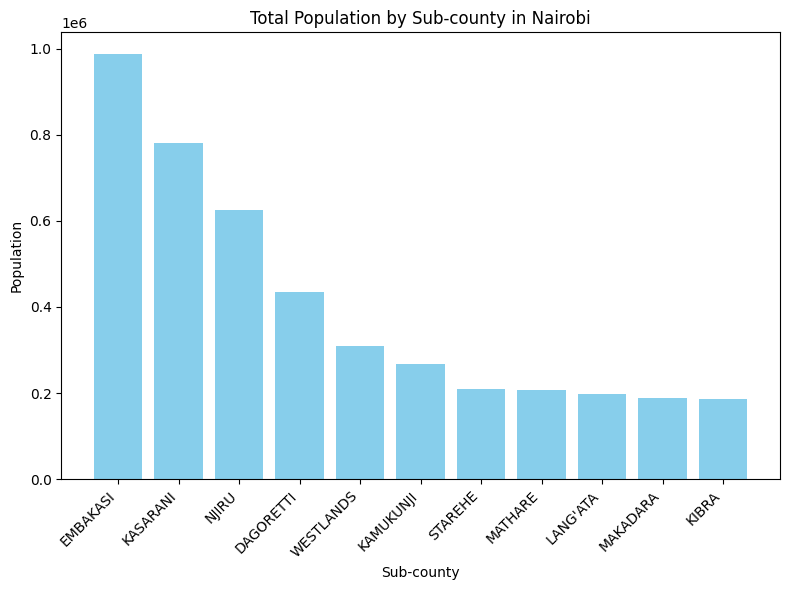

In [ ]:
# Sort the DataFrame by total population
sub_county_totals = sub_county_totals.sort_values(by='Total', ascending=False)

# Visualizing the total population across sub-counties
plt.figure(figsize=(8, 6))
plt.bar(sub_county_totals['sub-county'], sub_county_totals['Total'], color='skyblue')
plt.title('Total Population by Sub-county in Nairobi')
plt.xlabel('Sub-county')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Embakasi stands out as the most populous sub-county, with a population of nearly 1 million residents, while Starehe, Mathare, Lang'ata, Makadara, and Kibra have smaller populations compared to the others.
Potential implication is that higher populated areas like Embakasi may require more healthcare facilities to meet demand. We'll conduct more in-depth analysis to concretely determine this


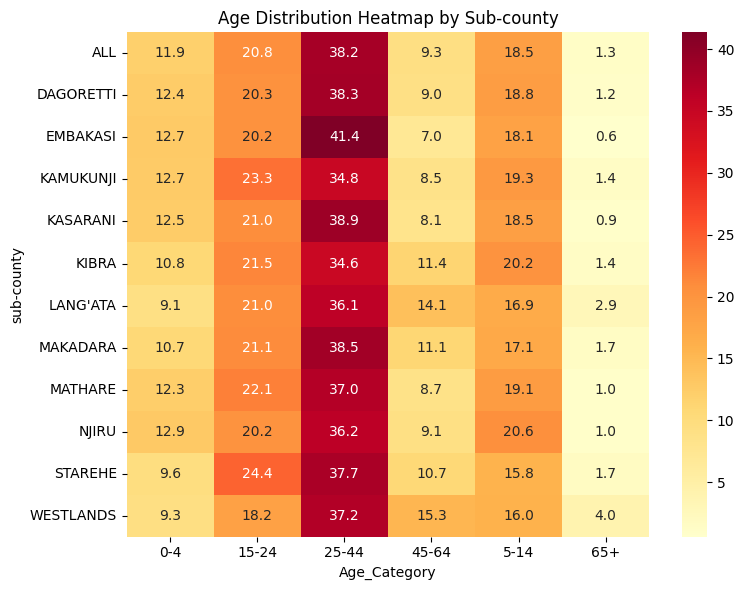


Sub-counties with highest proportion of young children (0-4):
sub-county
NJIRU        12.879630
EMBAKASI     12.739837
KAMUKUNJI    12.670039
KASARANI     12.513180
DAGORETTI    12.436051
Name: 0-4, dtype: float64

Sub-counties with highest proportion of elderly (65+):
sub-county
WESTLANDS    3.979521
LANG'ATA     2.887342
STAREHE      1.725826
MAKADARA     1.671125
KAMUKUNJI    1.422569
Name: 65+, dtype: float64


In [ ]:
# Calculate percentages of age categories
df_percentages = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100


# Heatmap of age distribution
plt.figure(figsize=(8, 6))
sns.heatmap(df_percentages, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Age Distribution Heatmap by Sub-county')
plt.tight_layout()
plt.show()

# Identify sub-counties with highest proportion of vulnerable age groups
young_children = df_percentages['0-4'].sort_values(ascending=False)
elderly = df_percentages['65+'].sort_values(ascending=False)

print("\nSub-counties with highest proportion of young children (0-4):")
print(young_children.head())

print("\nSub-counties with highest proportion of elderly (65+):")
print(elderly.head())

In [ ]:
df_percentages

Age_Category,0-4,15-24,25-44,45-64,5-14,65+
sub-county,,,,,,
ALL,11.941078,20.809198,38.166360,9.313498,18.452539,1.317327
DAGORETTI,12.436051,20.266600,38.259473,9.008760,18.845377,1.183739
EMBAKASI,12.739837,20.236190,41.353139,6.968991,18.102062,0.599781
KAMUKUNJI,12.670039,23.313215,34.781377,8.489191,19.323608,1.422569
KASARANI,12.513180,20.974360,38.910618,8.146404,18.523278,0.932160
KIBRA,10.848452,21.493943,34.640646,11.421265,20.174428,1.421265
LANG'ATA,9.073275,20.976156,36.080386,14.116122,16.866719,2.887342
MAKADARA,10.684227,21.074016,38.450660,11.064149,17.055822,1.671125
MATHARE,12.276862,22.069496,36.978741,8.664055,19.059954,0.950892


The distribution of age groups across different sub-counties in Nairobi is fairly consistent, with little variation observed. Below are some differences worth noting in certain age categories:

For young children (0-4 years old), Njiru has a slightly higher percentage at 12.88%.

For the elderly population (65+ years old) Westlands stands out with a noticeably higher percentage at 3.98%.

These small variations could have implications for healthcare planning, particularly in areas with slightly higher concentrations of young children or elderly residents, who often require more frequent or specialized medical care.

<Figure size 1200x800 with 0 Axes>

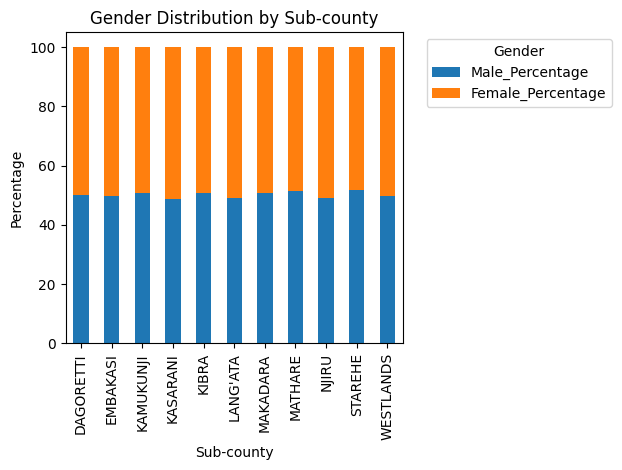


Sub-counties with highest proportion of males:
sub-county
STAREHE      51.885595
MATHARE      51.572016
KAMUKUNJI    50.945133
MAKADARA     50.847377
KIBRA        50.707872
Name: Male_Percentage, dtype: float64

Sub-counties with highest proportion of females:
sub-county
KASARANI     51.162603
LANG'ATA     51.032045
NJIRU        50.891291
WESTLANDS    50.194762
EMBAKASI     50.191859
Name: Female_Percentage, dtype: float64


In [ ]:

# Calculate percentages
sub_county_data['Male_Percentage'] = sub_county_data['Male'] / (sub_county_data['Male'] + sub_county_data['Female']) * 100
sub_county_data['Female_Percentage'] = sub_county_data['Female'] / (sub_county_data['Male'] + sub_county_data['Female']) * 100

# Create a DataFrame with just the percentages
df_percentages = sub_county_data[['sub-county', 'Male_Percentage', 'Female_Percentage']].set_index('sub-county')

# Plot the gender distribution
plt.figure(figsize=(12, 8))
df_percentages.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Sub-county')
plt.xlabel('Sub-county')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Identify sub-counties with highest proportion of each gender
male_proportion = df_percentages['Male_Percentage'].sort_values(ascending=False)
female_proportion = df_percentages['Female_Percentage'].sort_values(ascending=False)

print("\nSub-counties with highest proportion of males:")
print(male_proportion.head())

print("\nSub-counties with highest proportion of females:")
print(female_proportion.head())

In all sub-counties, the split between male and female populations is close to 50-50, with a slight tendency towards a higher male percentage. The differences in gender ratios between sub-counties are very small, likely not statistically significant for targeted healthcare planning purposes in particular sub-counties.

#### II. Facility Distribution analysis

To understand the distribution of healthcare facilities across Nairobi, I analyzed their distribution by type, ownership, and geographic location (sub-county). This analysis provides insights into the variety and spread of healthcare services available to the population.

Facility Distribution by Type:
Type
Medical Clinic                                  460
Dispensary                                      199
Health Centre                                    88
VCT Centre (Stand-Alone)                         56
Other Hospital                                   41
Nursing Home                                     25
Maternity Home                                   15
Laboratory (Stand-alone)                         13
Medical Centre                                   12
Dental Clinic                                    10
Health Programme                                  5
Training Institution in Health (Stand-alone)      4
Health Project                                    3
District Hospital                                 3
National Referral Hospital                        2
Eye Centre                                        2
District Health Office                            1
Eye Clinic                                        1
Radiology Unit              

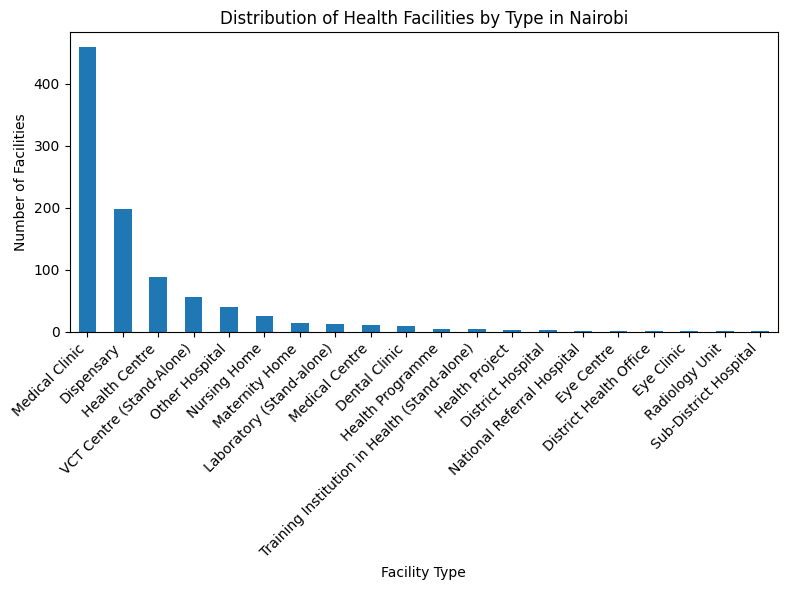

In [ ]:
# a. Distribution by Type
print("Facility Distribution by Type:")
print(health_facilities_reduced['Type'].value_counts())

plt.figure(figsize=(8, 6))
health_facilities_reduced['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Health Facilities by Type in Nairobi')
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Facility Distribution by Owner:
Owner
Private Enterprise (Institution)                   219
Private Practice - General Practitioner            161
Non-Governmental Organizations                     116
Private Practice - Unspecified                      63
Local Authority                                     58
Ministry of Health                                  56
Kenya Episcopal Conference-Catholic Secretariat     49
Private Practice - Nurse / Midwife                  40
Private Practice - Clinical Officer                 39
Private Practice - Medical Specialist               34
Other Faith Based                                   26
Christian Health Association of Kenya               24
Other Public Institution                            13
Community                                           11
Armed Forces                                         9
Parastatal                                           7
Academic (if registered)                             6
Company Medical Service   

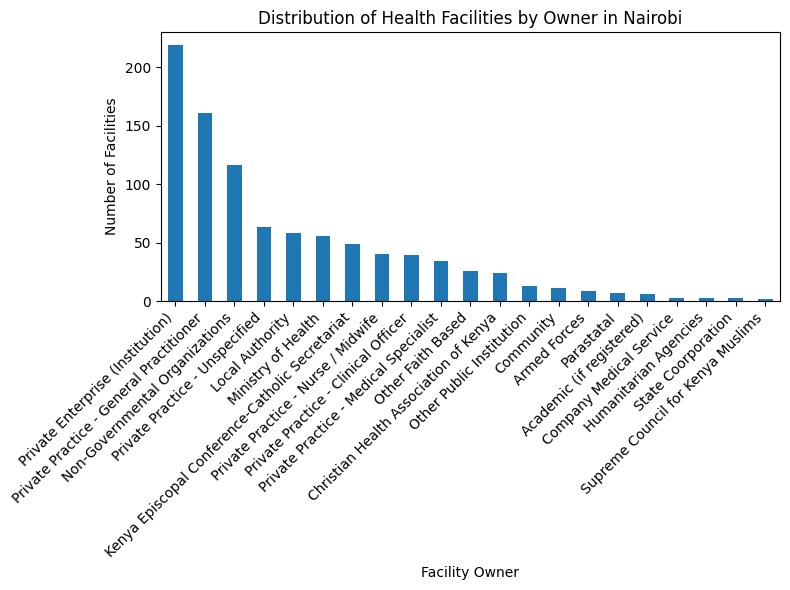

In [ ]:
# b. Distribution by Owner
print("\nFacility Distribution by Owner:")
print(health_facilities_reduced['Owner'].value_counts())

plt.figure(figsize=(8, 6))
health_facilities_reduced['Owner'].value_counts().plot(kind='bar')
plt.title('Distribution of Health Facilities by Owner in Nairobi')
plt.xlabel('Facility Owner')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Facility Distribution by Sub-county:
sub-county
EMBAKASI     152
STAREHE      137
KASARANI     124
DAGORETTI    105
KIBRA         85
WESTLANDS     72
LANG'ATA      69
NJIRU         68
KAMUKUNJI     59
MAKADARA      55
MATHARE       16
Name: count, dtype: int64


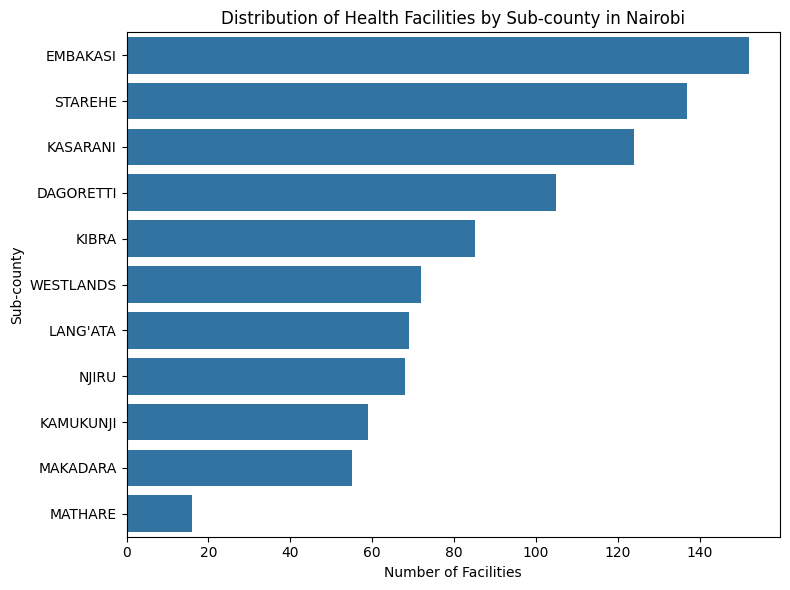

In [ ]:
# c. Distribution by Sub-county
print("\nFacility Distribution by Sub-county:")
print(health_facilities_reduced['sub-county'].value_counts())

plt.figure(figsize=(8, 6))
sns.barplot(x=health_facilities_reduced['sub-county'].value_counts().values,
            y=health_facilities_reduced['sub-county'].value_counts().index)
plt.title('Distribution of Health Facilities by Sub-county in Nairobi')
plt.xlabel('Number of Facilities')
plt.ylabel('Sub-county')
plt.tight_layout()
plt.show()

Based on these statistics, we can draw the following insights about the healthcare facility distribution in Nairobi:

- **Facility Types**:
Medical Clinics are the most common type of healthcare facility (460), followed by Dispensaries (199) and Health Centres (88).
There's a good variety of specialized facilities, including VCT Centres, Maternity Homes, and Dental Clinics.
Higher-level facilities like District Hospitals (3) and National Referral Hospitals (2) are fewer in number, which is expected in a tiered healthcare system.

- **Ownership**: The majority of facilities are privately owned, with Private Enterprise (219) and Private Practice - General Practitioner (161) being the most common.
There's significant involvement from Non-Governmental Organizations (116) and Faith-Based Organizations (e.g., Kenya Episcopal Conference-Catholic Secretariat with 49 facilities).
Government involvement is present but not dominant, with Local Authority (58) and Ministry of Health (56) facilities.

-  **Sub-county Distribution**: Embakasi has the highest number of facilities (152), which may reflect its large population or area.
Starehe (137) and Kasarani (124) also have a high number of facilities.
There's a notable disparity in facility numbers across sub-counties, with Mathare having significantly fewer facilities (16) compared to others.

Next, we calculate the density of healthcare facilities, which is defined by the WHO as the number of hospitals, including the following hospital categories: rural and district, provincial (second level referral), regional/specialized/teaching and research hospitals (tertiary care), from both public and private sectors, per 100,000 population. We perform this calculation for each sub-county to determine which areas may be underserved or overserved in terms of hospital availability.


In [ ]:
# Create Facility_Count column
facility_counts = health_facilities_reduced['sub-county'].value_counts()
sub_county_data['Facility_Count'] = sub_county_data['sub-county'].map(facility_counts)

# Calculate Facilities per 100,000 population
sub_county_data['Facilities_per_100k'] = (sub_county_data['Facility_Count'] / sub_county_data['Total']) * 100000

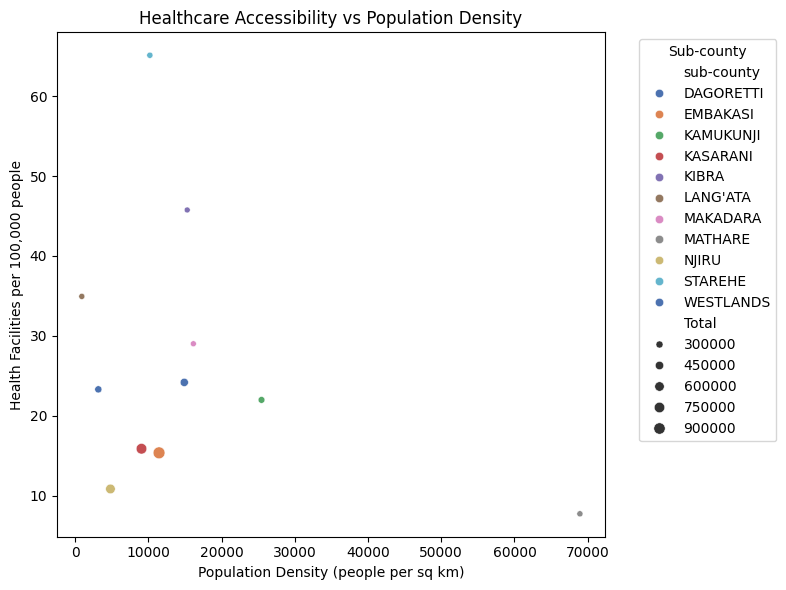


Potentially underserved areas (high density, low facility coverage):
  sub-county  Pop_Density  Facilities_per_100k
2  KAMUKUNJI      25455.0            21.992850
7    MATHARE      68940.0             7.746308


In [ ]:
# Visualize relationship between population density and healthcare accessibility
# Set a different color palette
palette = sns.color_palette("deep", n_colors=len(sub_county_data))

plt.figure(figsize=(8, 6))
sns.scatterplot(data=sub_county_data,
                x='Pop_Density',
                y='Facilities_per_100k',
                size='Total',
                hue='sub-county',
                palette=palette)

plt.title('Healthcare Accessibility vs Population Density')
plt.xlabel('Population Density (people per sq km)')
plt.ylabel('Health Facilities per 100,000 people')
plt.legend(title='Sub-county', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Identify potential healthcare deserts; high population density with low facility density
healthcare_deserts = sub_county_data[
    (sub_county_data['Pop_Density'] > sub_county_data['Pop_Density'].median()) &
    (sub_county_data['Facilities_per_100k'] < sub_county_data['Facilities_per_100k'].median())
]
print("\nPotentially underserved areas (high density, low facility coverage):")
print(healthcare_deserts[['sub-county', 'Pop_Density', 'Facilities_per_100k']])



The analysis of healthcare accessibility in Nairobi reveals significant disparities across sub-counties. Starehe stands out with exceptionally high healthcare accessibility, contrasting sharply with Mathare, which shows very low accessibility despite its high population density. Generally, larger sub-counties tend to have lower healthcare accessibility, suggesting a potential mismatch between population size and healthcare infrastructure.

###III. Capacity Analysis

This section analyzes the bed and cot capacity across different types of health facilities and sub-counties in Nairobi with an aim of providing crucial insights into the inpatient care capabilities of the healthcare system.

In [ ]:
health_facilities_reduced

,Facility Code,Facility Name,County,Type,Owner,Description of Location,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,sub-county
1,19310,St Jude's Huruma Community Health Services,Nairobi,Medical Clinic,Private Practice - Unspecified,Situated near Ndururumo Primary School (Juja R...,MATHARE,Kariobangi Market,0.0,0.0,N,Y,Operational,MATHARE
7,13043,7Kr Mrs Health Centre,Nairobi,Health Centre,Armed Forces,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,Lang'ata Shopping Center,14.0,0.0,Y,Y,Operational,LANG'ATA
10,20346,AAR Adams Health Centre,Nairobi,Medical Clinic,Private Practice - General Practitioner,Greenhouse Adams 1st Floor,KIBRA,Adams,0.0,0.0,N,Y,Operational,KIBRA
11,12861,AAR City Centre Clinic,Nairobi,Medical Clinic,Private Enterprise (Institution),Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,Nairobi,0.0,0.0,N,Y,Operational,STAREHE
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Medical Clinic,Private Enterprise (Institution),In Sarit Centre westlands,WESTLANDS,Nairobi,0.0,0.0,N,N,Operational,WESTLANDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,13260,Woodstreet Nursing Home,Nairobi,Nursing Home,Private Enterprise (Institution),NaN,KAMUKUNJI,Nairobi,10.0,0.0,N,N,Operational,KAMUKUNJI
10493,19273,Zimerbreeze Medical Centre,Nairobi,Medical Clinic,Private Practice - General Practitioner,Thika rd oof kamiti roadjust behind co-operati...,ROYSAMBU,just behind co-operative bank zimerman,0.0,0.0,N,Y,Operational,KASARANI
10494,19378,Zimma Health Care,Nairobi,Medical Clinic,Private Practice - General Practitioner,Next to index medical centre,ROYSAMBU,Next to index medical centre,0.0,0.0,N,Y,Operational,KASARANI
10495,13261,Zimmerman Medical Dispensary,Nairobi,Dispensary,Private Enterprise (Institution),NaN,ROYSAMBU,Nairobi,0.0,0.0,N,N,Operational,KASARANI



Total Bed Capacity: 7336.0
Total Cot Capacity: 1086.0

Capacity by Facility Type:
                                                Beds   Cots
Type                                                       
Dental Clinic                                    0.0    0.0
Dispensary                                     116.0   18.0
District Health Office                           0.0    0.0
District Hospital                             1012.0   22.0
Eye Centre                                       0.0    0.0
Eye Clinic                                       0.0    0.0
Health Centre                                  721.0   56.0
Health Programme                                 0.0    0.0
Health Project                                   0.0    0.0
Laboratory (Stand-alone)                         0.0    0.0
Maternity Home                                 205.0   23.0
Medical Centre                                  22.0    1.0
Medical Clinic                                 411.0  114.0
National Referral

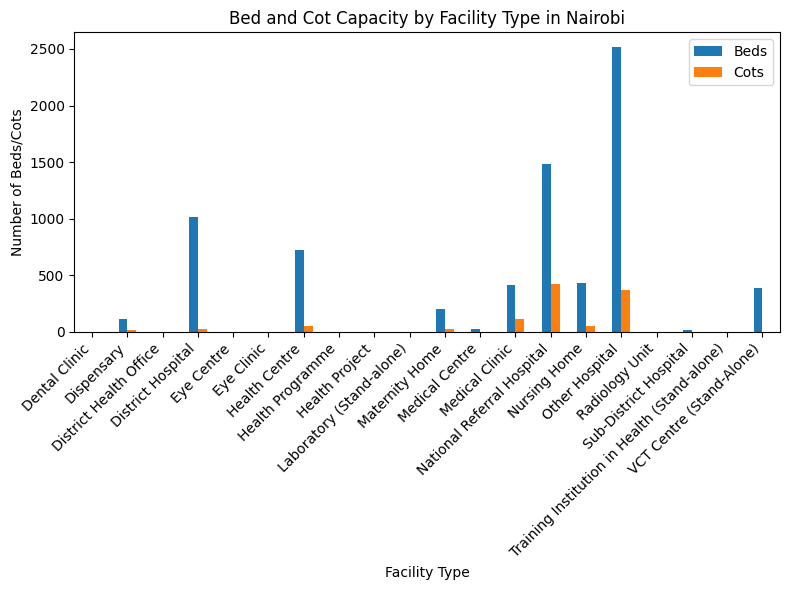

In [ ]:
# calculate total bed and cot capacity
print("\nTotal Bed Capacity:", health_facilities_reduced['Beds'].sum())
print("Total Cot Capacity:", health_facilities_reduced['Cots'].sum())

# Capacity by Facility Type
capacity_by_type = health_facilities_reduced.groupby('Type')[['Beds', 'Cots']].sum()
print("\nCapacity by Facility Type:")
print(capacity_by_type)

# Visualize capacity by facility type
capacity_by_type.plot(kind='bar', figsize=(8, 6))
plt.title('Bed and Cot Capacity by Facility Type in Nairobi')
plt.xlabel('Facility Type')
plt.ylabel('Number of Beds/Cots')
plt.legend(['Beds', 'Cots'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Next, I examine the bed and cot capacity per 1000 persons by sub-county to identify potentially sub-counties with low rations. WHO recommended standard is 5 hospital beds per 1000 members of the population

In [ ]:
facilities_group = health_facilities_reduced.groupby('sub-county')[['Beds', 'Cots']].sum()

In [ ]:
facilities_group.reset_index()

,sub-county,Beds,Cots
0,DAGORETTI,626.0,112.0
1,EMBAKASI,779.0,162.0
2,KAMUKUNJI,1083.0,206.0
3,KASARANI,186.0,31.0
4,KIBRA,1784.0,441.0
5,LANG'ATA,746.0,0.0
6,MAKADARA,195.0,19.0
7,MATHARE,730.0,0.0
8,NJIRU,217.0,25.0
9,STAREHE,357.0,58.0


In [ ]:
# perform data aggregation and merging to prepare for the capacity analysis
facilities_grouped = health_facilities_reduced.groupby('sub-county').agg(
    total_cots=('Cots', 'sum'),
    total_beds=('Beds', 'sum')
).reset_index()

merged_df = pd.merge(sub_county_totals, facilities_grouped, on='sub-county', how='left')
#merged_df = merged_df.drop(0, axis=0).reset_index(drop=True)
#check data types
print(merged_df.dtypes)
merged_df.head()

sub-county     object
Male            int64
Female          int64
Total           int64
total_cots    float64
total_beds    float64
dtype: object


,sub-county,Male,Female,Total,total_cots,total_beds
0,EMBAKASI,492476,496270,988746,162.0,779.0
1,KASARANI,381234,399385,780619,31.0,186.0
2,NJIRU,307642,318809,626451,25.0,217.0
3,DAGORETTI,217651,216526,434177,112.0,626.0
4,WESTLANDS,153818,155021,308839,32.0,633.0


In [ ]:
# Calculate beds per 1000 people
merged_df['Beds_per_1000'] = (merged_df['total_beds'] / merged_df['Total']) * 1000

# Calculate cots per 1000 people
merged_df['Cots_per_1000'] = (merged_df['total_cots'] / merged_df['Total']) * 1000

# Print the DataFrame with new calculations
print(merged_df[['sub-county', 'Beds_per_1000', 'Cots_per_1000']])

   sub-county  Beds_per_1000  Cots_per_1000
0    EMBAKASI       0.787867       0.163844
1    KASARANI       0.238272       0.039712
2       NJIRU       0.346396       0.039907
3   DAGORETTI       1.441808       0.257959
4   WESTLANDS       2.049612       0.103614
5   KAMUKUNJI       4.036993       0.767886
6     STAREHE       1.696679       0.275651
7     MATHARE       3.534253       0.000000
8    LANG'ATA       3.777751       0.000000
9    MAKADARA       1.028883       0.100250
10      KIBRA       9.603376       2.373929


Key Insights:

1. Total capacity is 7,336 beds and 1,086 cots, with significant variation across facility types and sub-counties.
2. Other Hospitals, National Referral Hospitals, and District Hospitals have the highest bed capacities.
3. Kibra has the highest total capacity per 1,000 people (11.98), while Kasarani has the lowest (0.28).
4. Some sub-counties (Mathare, Lang'ata) have no cot capacity indicating gaps emergency and temporary care.
5. Specialized facilities (e.g., Dental Clinics, Eye Centers) generally have no inpatient capacity.



####IV. Operational Status Assessment

This section examines the current functioning state of health facilities across Nairobi. This analysis is crucial for understanding the actual availability of healthcare services and identifying potential gaps in the healthcare system's operational status


Operational Status of Facilities:
Operational Status
Operational        917
Not-Operational     19
Pending Opening      6
Name: count, dtype: int64

Sub-counties with Non-operational Facilities:
sub-county
KASARANI    7
EMBAKASI    7
MAKADARA    2
KIBRA       1
NJIRU       1
LANG'ATA    1
Name: count, dtype: int64


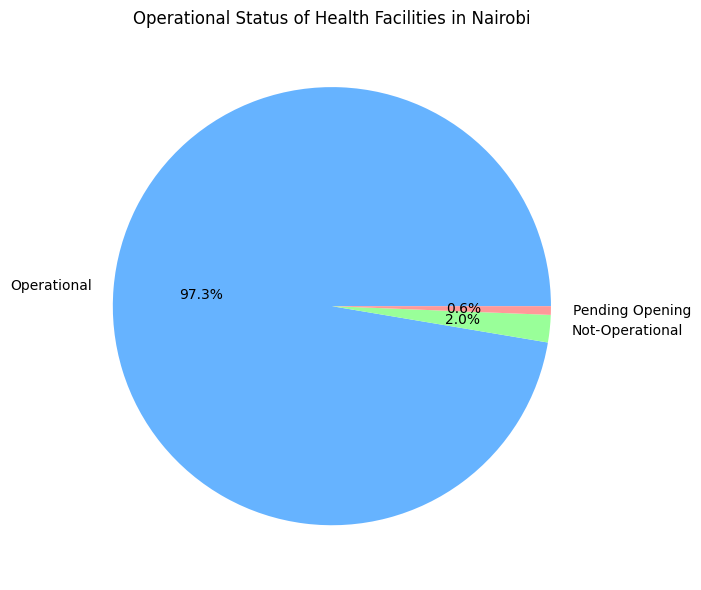

In [ ]:
# 3. Operational Status Assessment
print("\nOperational Status of Facilities:")
print(health_facilities_reduced['Operational Status'].value_counts())

# view sub-counties with non-operational facilities
non_operational_facilities = health_facilities_reduced[health_facilities_reduced['Operational Status'] == 'Not-Operational']
print("\nSub-counties with Non-operational Facilities:")
print(non_operational_facilities['sub-county'].value_counts())

# Visualize operational status
colors = ['#66b3ff', '#99ff99', '#ff9999']
plt.figure(figsize=(8, 6))
health_facilities_reduced['Operational Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Operational Status of Health Facilities in Nairobi')
plt.ylabel('')
plt.tight_layout()
plt.show()


The vast majority of health facilities (97.3%) in Nairobi are operational, indicating a generally active healthcare system.

A small proportion (2.0%) of facilities are not operational, which may impact healthcare accessibility in certain areas.

A few facilities (0.6%) are pending opening, suggesting ongoing efforts to expand healthcare infrastructure.

Of the non-operational facilities, 7 are in Kasarani, 7 in Embakasi, 2 in Makadara, 2 in Kibra, 1 in Njiru, and 1 in Lang'ata. This distribution highlights that Kasarani and Embakasi, which are among the sub-counties with lower healthcare accessibility, also have the highest number of non-operational facilities, exacerbating the healthcare access challenges in these areas.